In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sp

In [ ]:
player_centrality = pd.read_csv('/content/drive/MyDrive/Msc_project/data/player_centrality.csv').values

In [ ]:
player_centrality

array([[1.74620674e+08, 5.43509909e-04, 1.37053899e-03, 2.60034602e-01,
        1.31388105e-06],
       [1.98737940e+07, 1.16466409e-04, 0.00000000e+00, 1.83516484e-01,
        7.02844464e-10],
       [2.13106702e+08, 5.82332046e-04, 1.59237672e-02, 2.53414264e-01,
        8.35985981e-07],
       ...,
       [2.58072572e+08, 1.49465225e-03, 1.33067199e-03, 2.14133067e-01,
        1.98813832e-10],
       [2.12990000e+05, 2.05757323e-03, 0.00000000e+00, 2.44788274e-01,
        1.12806110e-06],
       [2.33684991e+08, 4.27043500e-04, 3.96720983e-03, 2.30238971e-01,
        2.81954144e-08]])

In [ ]:
X = player_centrality[:,1:5]

In [ ]:
from sklearn.preprocessing import normalize

# Regularzation
X_no = normalize(X, axis = 0, norm='max')

print(X_no, X_no.shape[0])

[[9.49152542e-02 3.77203912e-03 6.96193772e-01 2.17750759e-06]
 [2.03389831e-02 0.00000000e+00 4.91330891e-01 1.16483083e-09]
 [1.01694915e-01 4.38258766e-02 6.78469061e-01 1.38548754e-06]
 ...
 [2.61016949e-01 3.66231594e-03 5.73301040e-01 3.29496060e-10]
 [3.59322034e-01 0.00000000e+00 6.55374593e-01 1.86954641e-06]
 [7.45762712e-02 1.09186756e-02 6.16421569e-01 4.67285291e-08]] 1504


In [ ]:
minmax = sp.MinMaxScaler()
minmax_scaled = minmax.fit_transform(X)
minmax_scaled

array([[9.18367347e-02, 3.77203912e-03, 4.43868434e-01, 2.17750757e-06],
       [1.70068027e-02, 0.00000000e+00, 6.88573117e-02, 1.16480383e-09],
       [9.86394558e-02, 4.38258766e-02, 4.11422518e-01, 1.38548751e-06],
       ...,
       [2.58503401e-01, 3.66231594e-03, 2.18907518e-01, 3.29469054e-10],
       [3.57142857e-01, 0.00000000e+00, 3.69147010e-01, 1.86954638e-06],
       [7.14285714e-02, 1.09186756e-02, 2.97841670e-01, 4.67285021e-08]])

In [ ]:
# mannully set initial centroid
init = np.array([[1,1,1,1],
          [0,0,0,0]])

In [ ]:
model = KMeans(n_clusters=2,
                init = init
               )
result = model.fit_predict(X_no)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


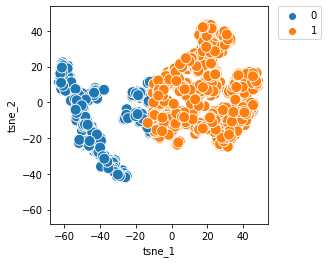

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE( n_components =2
    # random_state = 105
    )

tsne_result = tsne.fit_transform(X_no)

# visualizing

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': result})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

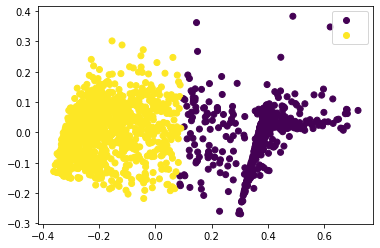

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X_no)
plot = plt.scatter(Xt[:,0], Xt[:,1], c= result)
plt.legend(handles=plot.legend_elements()[0], 
           )
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# initializing the model
lda = LinearDiscriminantAnalysis()

# fitting the dataset
X_r2 = lda.fit_transform(X_no, result)

In [ ]:
X_r2

array([[ 2.20898317],
       [ 2.7925621 ],
       [ 2.10048922],
       ...,
       [ 0.52672391],
       [-0.36208075],
       [ 2.34569514]])

In [ ]:
sns.boxplot(x='species', y='petal length (cm)', data=iris)

In [ ]:
print(result)
print(np.sum(result == 1))

[1 1 1 ... 1 1 1]
1007


In [ ]:
player_type = np.c_[X_no, result.T]

deg_cen = player_type[:,0]
bet_cen = player_type[:,1]
clo_cen = player_type[:,2]
eig_cen = player_type[:,3]

key_player = player_type[:,-1]


In [ ]:
player_type = pd.read_csv('/content/drive/MyDrive/Msc_project/data/player_centrality.csv',index_col=0)

# key_player = player_type[:,-1]

player_type['key_player']= key_player.tolist()
player_type['deg_cen']= deg_cen.tolist()
player_type['bet_cen']= bet_cen.tolist()
player_type['clo_cen']= clo_cen.tolist()
player_type['eig_cen']= eig_cen.tolist()




# result.tolist()

player_type

,deg_cen,bet_cen,clo_cen,eig_cen,key_player
174620674,0.094915,0.003772,0.696194,2.177508e-06,1.0
19873794,0.020339,0.000000,0.491331,1.164831e-09,1.0
213106702,0.101695,0.043826,0.678469,1.385488e-06,1.0
8429583,0.230508,0.000000,0.588390,2.275971e-09,1.0
172384280,0.044068,0.000000,0.495689,3.738913e-10,1.0
...,...,...,...,...,...
247832548,0.677966,0.000000,0.670890,1.227002e-07,0.0
1284300791,0.044068,0.000000,0.453766,1.891633e-13,1.0
258072572,0.261017,0.003662,0.573301,3.294961e-10,1.0
212990,0.359322,0.000000,0.655375,1.869546e-06,1.0


In [ ]:
player_type.to_csv('player_type.csv')
!cp player_type.csv 'drive/MyDrive/Msc_project/data/player_type.csv'